In [39]:
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
input_file = 'vsepp_accs_gridsearch_diversity.csv'
diversity_results = pd.read_csv(input_file, index_col=0)

In [13]:
input_file = 'vsepp_accs_test.csv'
results = pd.read_csv(input_file, index_col=0)

In [33]:
all_results = pd.concat((diversity_results, results))

all_results['baseline'] = all_results.method.map(lambda x: True if x in ['beam', 'greedy'] else False)
all_results['informativity'] = all_results.method.map(lambda x: True if x in ['distfuse_es', 'predfuse_es', 'rsa'] else False)
all_results['diversity'] = all_results.method.map(lambda x: True if x in ['nucleus', 'topk'] else False)

d2_results = all_results.loc[all_results.n_distractors == 2]
d4_results = all_results.loc[all_results.n_distractors == 4]
d9_results = all_results.loc[all_results.n_distractors == 9]

In [57]:
def plot_results(df):
 
    df.sort_values(
        ['baseline', 'diversity', 'informativity', 'method', '_lambda', 'rationality', 'topp', 'topk'], 
        ascending = [True, True, True, False, False, False, False, False]
    ).acc.plot(kind='barh', figsize=(10,40), grid=True)
    
    plt.show()

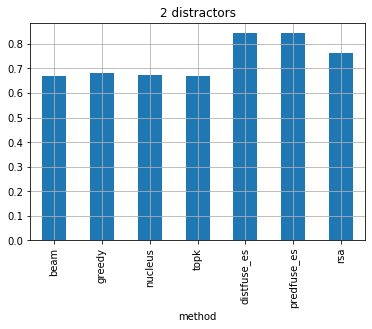

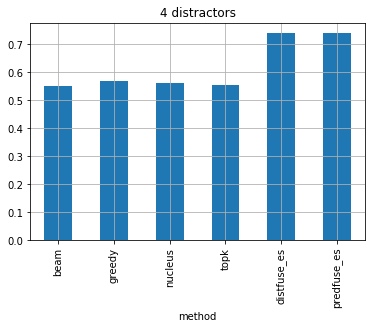

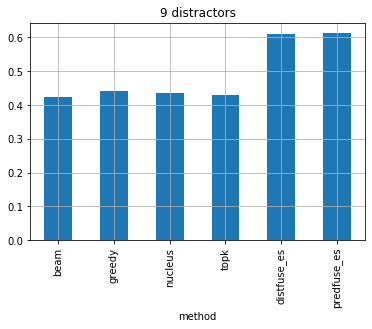

In [76]:
d2_results\
    .groupby('method').mean()\
    .loc[['beam', 'greedy', 'nucleus', 'topk', 'distfuse_es', 'predfuse_es', 'rsa']]\
    .acc.plot(kind='bar', grid=True)
plt.title('2 distractors')
plt.show()

d4_results\
    .groupby('method').mean()\
    .loc[['beam', 'greedy', 'nucleus', 'topk', 'distfuse_es', 'predfuse_es']]\
    .acc.plot(kind='bar', grid=True)
plt.title('4 distractors')
plt.show()

d9_results\
    .groupby('method').mean()\
    .loc[['beam', 'greedy', 'nucleus', 'topk', 'distfuse_es', 'predfuse_es']]\
    .acc.plot(kind='bar', grid=True)
plt.title('9 distractors')
plt.show()

2 distractors


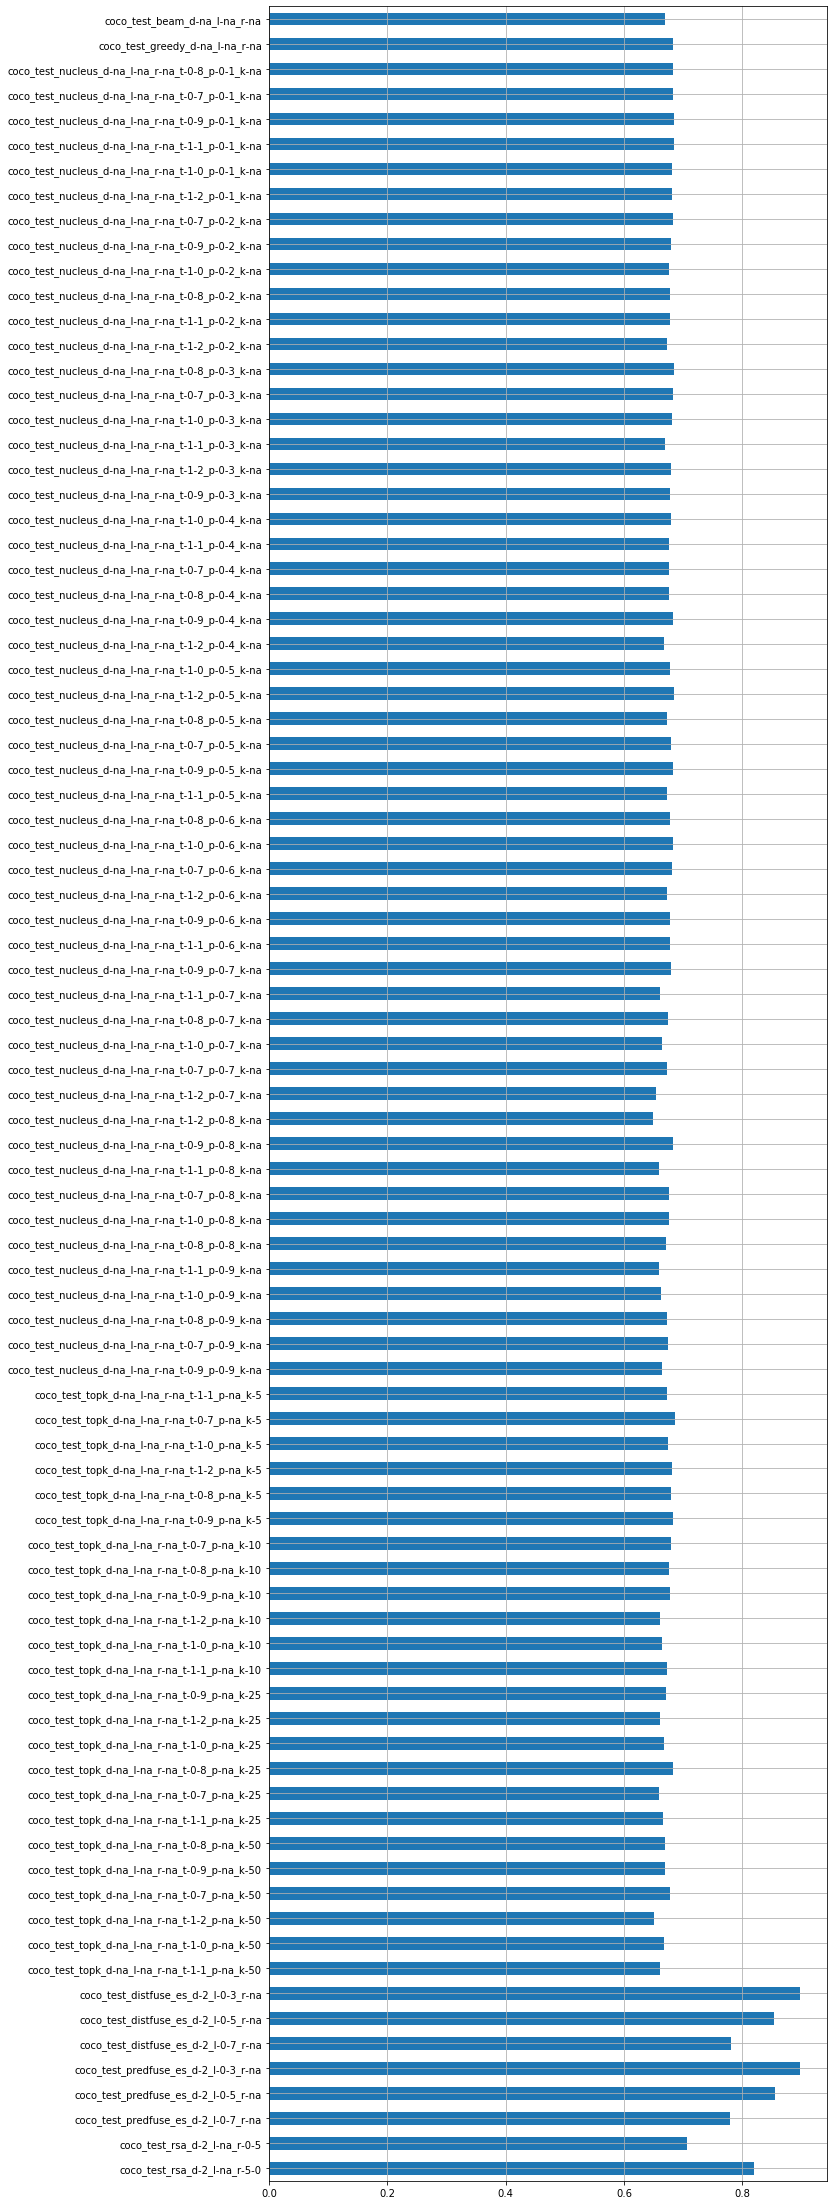

4 distractors


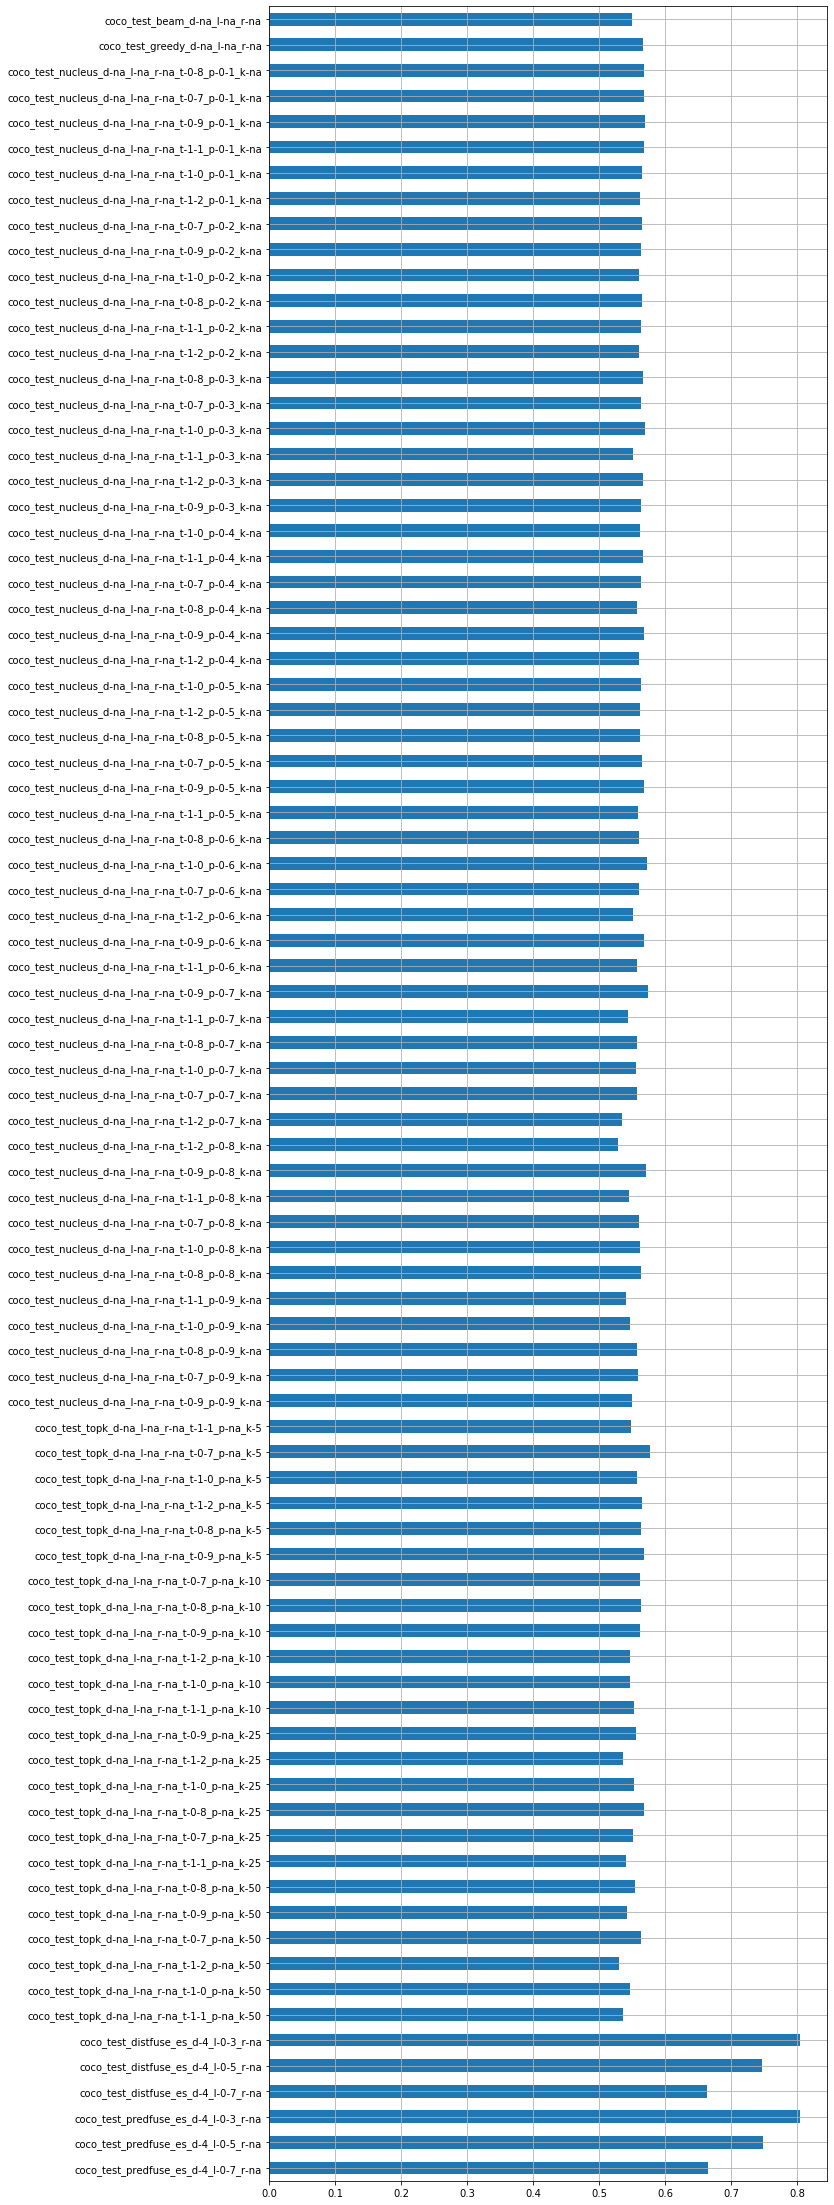

9 distractors


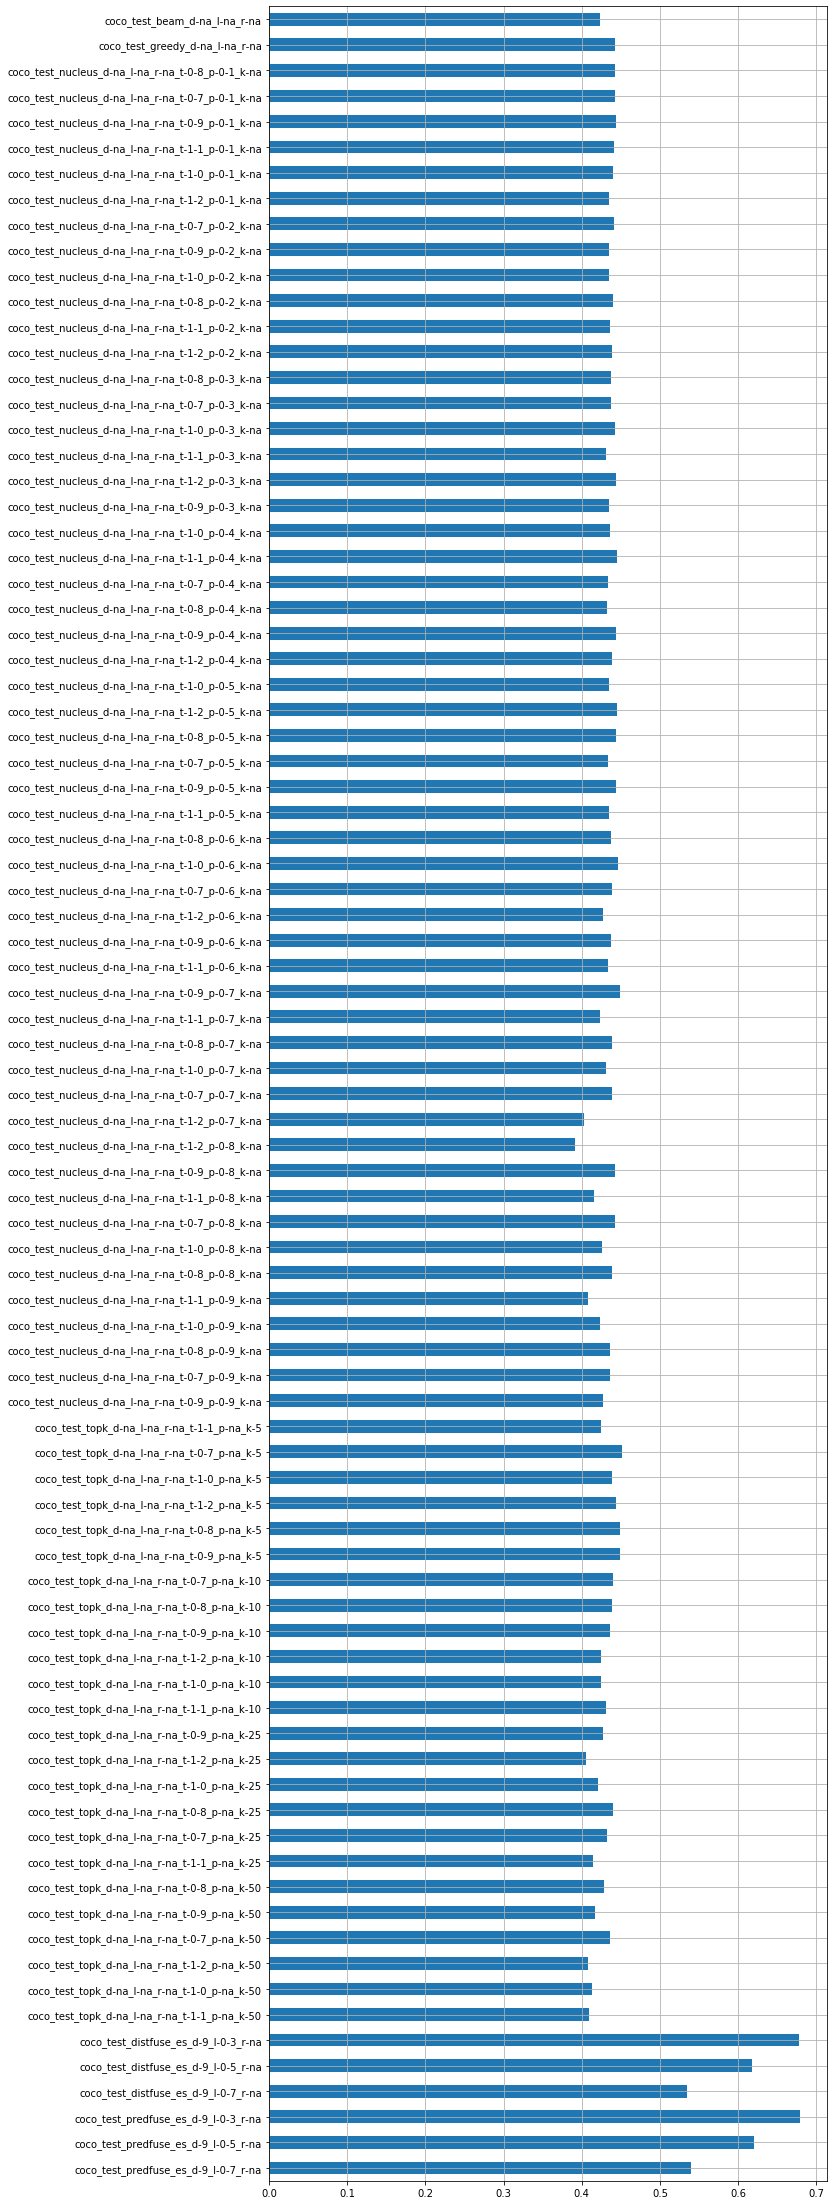

In [58]:
print('2 distractors')
plot_results(d2_results)

print('4 distractors')
plot_results(d4_results)

print('9 distractors')
plot_results(d9_results)